# Analysis
This time (06/04/2018), northern hemisphere is summer while southern now is winter season so:
 - Temperature ranges in Northern Hemisphere are greater than the southern ranges at corresponding latitudes.Northern Hemisphere is also higher temperature than southern now
 - Humidity ranges in Northern Hemisphere are greater than the southern ranges at corresponding latitudes.Northern Hemisphere's Humidity is also higher than southern now
 - Wind speed ranges in Northern Hemisphere are greater than the southern ranges at corresponding latitudes.Northern Hemisphere's wind speed is also stronger than southern now

In [2]:
!pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
from citipy import citipy
import random
import sys
import math
from config import api_key
import json
import requests
import numpy
from datetime import datetime

In [4]:
#Create latitude & longitude
lat = []
lon=[]
for i in range(1,10000):                 #number of Lat Long (in this case 10000) to be generated
 lat.append(float("{:.2f}".format(random.uniform(-90.0,90.0))))
 lon.append(float("{:.2f}".format(random.uniform(-180.0,180.0))))

In [5]:
#Create a list of cities match with lat & long
cities = []
name = []
country_code = []
for k in range(len(lat)):
    cities.append(citipy.nearest_city(lat[k], lon[k]))
for city in cities:
    country_code.append(city.country_code)
    name.append(city.city_name)
    #print(f"The country code of {name} is '{country_code}'.")
cities_df = pd.DataFrame({"Lat":lat,"Lon":lon,"City Name":name,"Country Code":country_code})
#Drop duplicate Cities by using City Name
cities_df.drop_duplicates(subset=['City Name'],inplace=True)
cities_df.to_csv("nearestcities.csv", index = False)
len(cities_df)

2245

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial" # to get weather data in Fahrenheit degree and wind speed in MPH
temp=[]
humidity=[]
cloud=[]
wind=[]
cityname=[]
countrycode=[]
lati=[]
long=[]
check=""
citinumber = 1
# Build partial query URL
query_url =  f"{url}appid={api_key}&units={units}&q="
i=0
print("Beginning Data Retrieval")
print("------------------------")
while i <= len(cities_df):
    try:
        response = requests.get(query_url + cities_df['City Name'][i]).json()
        response["main"]["temp"] #checking if wrong City Name, will only show KeyError once we look for a index,example 'main' index
    except KeyError:
        check = "KeyError"
        pass
    if check != "KeyError": # to make sure same length of each column, if try to push "withdrawing data" in Try then length of column will not same or have to use DROPNA,as able to fetching columns' NaN values
        print(f"Processing Record {citinumber} of Set {citinumber} | {cities_df['City Name'][i]}")
        print(f"{query_url}{cities_df['City Name'][i]}")
        cityname.append(cities_df['City Name'][i])
        countrycode.append(cities_df['Country Code'][i])
        lati.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        citinumber=citinumber+1
    i=i+1
    check = "check"
final_df= pd.DataFrame({"City Name":cityname,"Country Code":countrycode,"Latitude":lati,"Longitude":long,"Temperature":temp,"Humidity":humidity,"Cloudness":cloud,"Wind":wind})
#Again execute a drop duplicate command on City Name to make sure this dataframe will only contain  unique cities
final_df.drop_duplicates(subset=['City Name'],inplace=True)
final_df.to_csv("weather.csv", index = False)
print(citinumber-1)
print(len(final_df))
final_df.head()

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | nouakchott
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nouakchott
Processing Record 2 of Set 2 | takanabe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=takanabe
Processing Record 3 of Set 3 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=emerald
Processing Record 4 of Set 4 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sao joao da barra
Processing Record 5 of Set 5 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
Processing Record 6 of Set 6 | muros
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=muros
Processing Record 7 of Set

Processing Record 54 of Set 54 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=esperance
Processing Record 55 of Set 55 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=victoria
Processing Record 56 of Set 56 | platanos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=platanos
Processing Record 57 of Set 57 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=guerrero negro
Processing Record 58 of Set 58 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yulara
Processing Record 59 of Set 59 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cockburn town
Processing Record 60 of Set 60 | muncar
http://api.openw

Processing Record 107 of Set 107 | seymchan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=seymchan
Processing Record 108 of Set 108 | luganville
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=luganville
Processing Record 109 of Set 109 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=leningradskiy
Processing Record 110 of Set 110 | pithiviers
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pithiviers
Processing Record 111 of Set 111 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ribeira grande
Processing Record 112 of Set 112 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=georgetown
Processing Record 113 of Set 1

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=isabela
Processing Record 161 of Set 161 | sisimiut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sisimiut
Processing Record 162 of Set 162 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bandarbeyla
Processing Record 163 of Set 163 | haapiti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=haapiti
Processing Record 164 of Set 164 | tevriz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tevriz
Processing Record 165 of Set 165 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rio grande
Processing Record 166 of Set 166 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=25bc9

Processing Record 214 of Set 214 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kavaratti
Processing Record 215 of Set 215 | beira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beira
Processing Record 216 of Set 216 | bauchi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bauchi
Processing Record 217 of Set 217 | ishinomaki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ishinomaki
Processing Record 218 of Set 218 | prescott
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=prescott
Processing Record 219 of Set 219 | franklin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=franklin
Processing Record 220 of Set 220 | hobart
http://api.openweathermap.

Processing Record 267 of Set 267 | biltine
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=biltine
Processing Record 268 of Set 268 | imbituba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=imbituba
Processing Record 269 of Set 269 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=codrington
Processing Record 270 of Set 270 | acari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=acari
Processing Record 271 of Set 271 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-joseph
Processing Record 272 of Set 272 | steamboat springs
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=steamboat springs
Processing Record 273 of Set 273 | lata
ht

Processing Record 320 of Set 320 | tabas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tabas
Processing Record 321 of Set 321 | sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sept-iles
Processing Record 322 of Set 322 | mana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mana
Processing Record 323 of Set 323 | bulgan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bulgan
Processing Record 324 of Set 324 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=longyearbyen
Processing Record 325 of Set 325 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hamilton
Processing Record 326 of Set 326 | nelidovo
http://api.openweathermap.or

Processing Record 374 of Set 374 | havelock
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=havelock
Processing Record 375 of Set 375 | balassagyarmat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=balassagyarmat
Processing Record 376 of Set 376 | pratapgarh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pratapgarh
Processing Record 377 of Set 377 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=karratha
Processing Record 378 of Set 378 | savannah bight
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=savannah bight
Processing Record 379 of Set 379 | russell
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=russell
Processing Record 380 of Set 380 | cha

Processing Record 427 of Set 427 | lyubytino
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lyubytino
Processing Record 428 of Set 428 | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yeppoon
Processing Record 429 of Set 429 | roebourne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=roebourne
Processing Record 430 of Set 430 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vila velha
Processing Record 431 of Set 431 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bambous virieux
Processing Record 432 of Set 432 | shu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=shu
Processing Record 433 of Set 433 | morondava
http://ap

Processing Record 479 of Set 479 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sioux lookout
Processing Record 480 of Set 480 | lakatoro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lakatoro
Processing Record 481 of Set 481 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tautira
Processing Record 482 of Set 482 | sambava
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sambava
Processing Record 483 of Set 483 | pervomayskoye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pervomayskoye
Processing Record 484 of Set 484 | ginda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ginda
Processing Record 485 of Set 485 | bereda
http://api.o

Processing Record 532 of Set 532 | mulanje
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mulanje
Processing Record 533 of Set 533 | hun
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hun
Processing Record 534 of Set 534 | kedrovyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kedrovyy
Processing Record 535 of Set 535 | itacoatiara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=itacoatiara
Processing Record 536 of Set 536 | ola
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ola
Processing Record 537 of Set 537 | sechura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sechura
Processing Record 538 of Set 538 | bata
http://api.openweathermap.org/data/2.5/wea

Processing Record 586 of Set 586 | goulburn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=goulburn
Processing Record 587 of Set 587 | tsabong
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tsabong
Processing Record 588 of Set 588 | luau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=luau
Processing Record 589 of Set 589 | praya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=praya
Processing Record 590 of Set 590 | nabire
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nabire
Processing Record 591 of Set 591 | roma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=roma
Processing Record 592 of Set 592 | ongole
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 639 of Set 639 | bulungu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bulungu
Processing Record 640 of Set 640 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hervey bay
Processing Record 641 of Set 641 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aswan
Processing Record 642 of Set 642 | south lake tahoe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=south lake tahoe
Processing Record 643 of Set 643 | kanniyakumari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kanniyakumari
Processing Record 644 of Set 644 | adre
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=adre
Processing Record 645 of Set 645 | pokrovsk
http:/

Processing Record 692 of Set 692 | tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tomatlan
Processing Record 693 of Set 693 | kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kungurtug
Processing Record 694 of Set 694 | portland
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=portland
Processing Record 695 of Set 695 | asyut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=asyut
Processing Record 696 of Set 696 | hays
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hays
Processing Record 697 of Set 697 | huilong
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=huilong
Processing Record 698 of Set 698 | xuanzhou
http://api.openweathermap.org/data

Processing Record 745 of Set 745 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=los llanos de aridane
Processing Record 746 of Set 746 | kathmandu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kathmandu
Processing Record 747 of Set 747 | okha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=okha
Processing Record 748 of Set 748 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tuy hoa
Processing Record 749 of Set 749 | mtwara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mtwara
Processing Record 750 of Set 750 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port augusta
Processing Record 751 of Set 751 | kysyl-s

,City Name,Cloudness,Country Code,Humidity,Latitude,Longitude,Temperature,Wind
0,nouakchott,0,mr,90,18.08,-15.98,72.05,13.15
1,takanabe,75,jp,94,32.13,131.49,73.40,2.24
2,emerald,0,au,38,-23.53,148.16,72.50,10.54
3,sao joao da barra,56,br,100,-21.64,-41.05,72.05,10.36
4,rikitea,12,pf,100,-23.12,-134.97,70.70,10.42


# Temperature (F) vs. Latitude

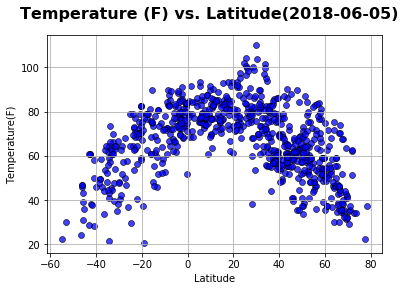

In [9]:
plt.scatter(final_df['Latitude'],final_df['Temperature'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.suptitle(f"Temperature (F) vs. Latitude({now})", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()
plt.savefig("Images/temperaturelatitude.png")
plt.show()

# Humidity (%) vs. Latitude

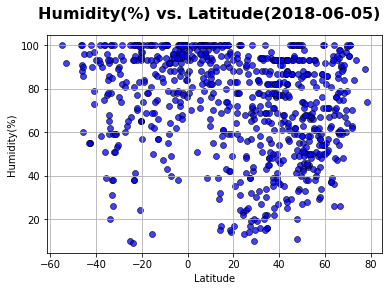

In [10]:
plt.scatter( final_df['Latitude'],final_df['Humidity'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle(f"Humidity(%) vs. Latitude({now})", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig("Images/humiditylatitude.png")
plt.show()

# Cloudiness (%) vs. Latitude

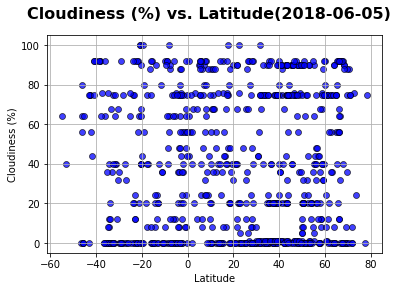

In [11]:
plt.scatter(final_df['Latitude'],final_df['Cloudness'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle(f"Cloudiness (%) vs. Latitude({now})", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Images/cloudinesslatitude.png")
plt.show()

# Wind Speed (mph) vs. Latitude

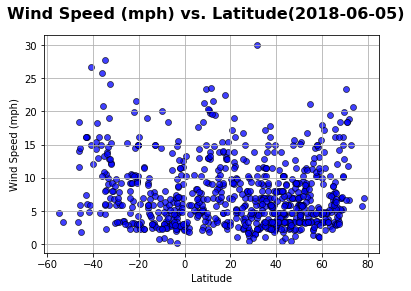

In [12]:
plt.scatter(final_df['Latitude'],final_df['Wind'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle(f"Wind Speed (mph) vs. Latitude({now})", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/windspeedlatitude.png")
plt.show()